In [ ]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance_churn.csv')

In [ ]:
# checking for missing values
print(df.isnull().sum())

# converting categorical columns to category type
categorical_cols = ['Gender', 'Marital_Status', 'Policy_Type', 'Customer_Segment',
                    'Education_Level', 'Payment_Method', 'Region', 'Policy_Renewed_Last_Year']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Customer_ID                    0
Age                            0
Gender                         0
Marital_Status                 0
Policy_Type                    0
Policy_Tenure_Years            0
Premium_Amount                 0
Claim_Count                    0
Total_Claim_Amount             0
Customer_Segment               0
Income                         0
Education_Level                0
Dependents                     0
Customer_Satisfaction_Score    0
Payment_Method                 0
Contact_Frequency              0
Last_Interaction_Days          0
Discount_Received (%)          0
Loyalty_Score                  0
Region                         0
Policy_Renewed_Last_Year       0
Churned                        0
dtype: int64


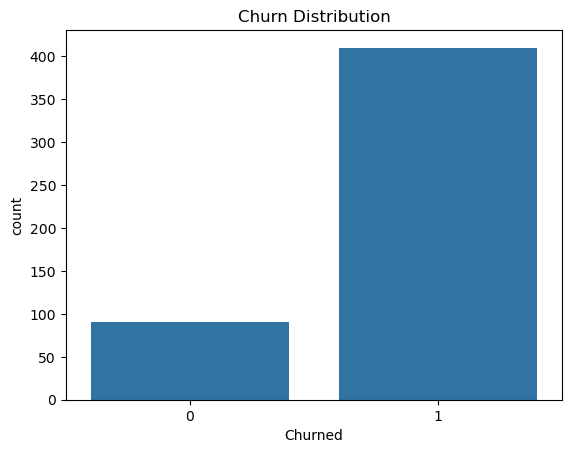

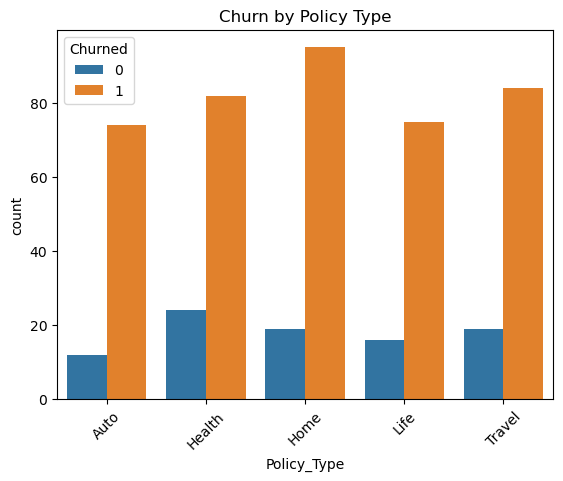

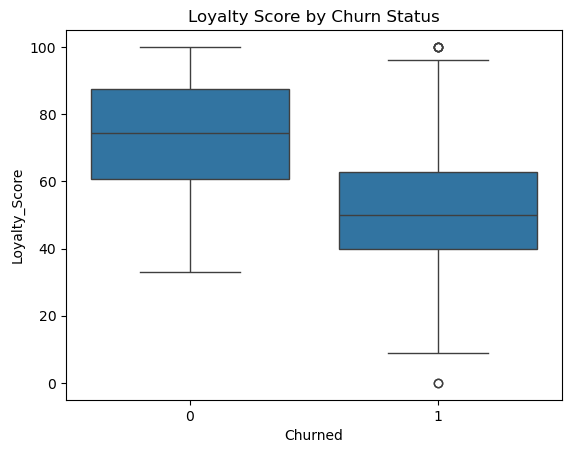

In [3]:
sns.countplot(x="Churned", data=df)
plt.title('Churn Distribution')
plt.show()

# churn by policy type
sns.countplot(x="Policy_Type", hue="Churned", data=df)
plt.title('Churn by Policy Type')
plt.xticks(rotation=45)
plt.show()

# loyalty score vs churn
sns.boxplot(x="Churned", y="Loyalty_Score", data=df)
plt.title('Loyalty Score by Churn Status')
plt.show()


In [5]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalize numerical features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Premium_Amount', 'Claim_Count', 'Total_Claim_Amount',
                  'Income', 'Customer_Satisfaction_Score', 'Discount_Received (%)',
                  'Loyalty_Score', 'Policy_Tenure_Years', 'Last_Interaction_Days']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_encoded.drop('Churned', axis=1)
y = df_encoded['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  9]
 [ 2 84]]
              precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.90      0.98      0.94        86

    accuracy                           0.89       100
   macro avg       0.81      0.67      0.71       100
weighted avg       0.88      0.89      0.87       100



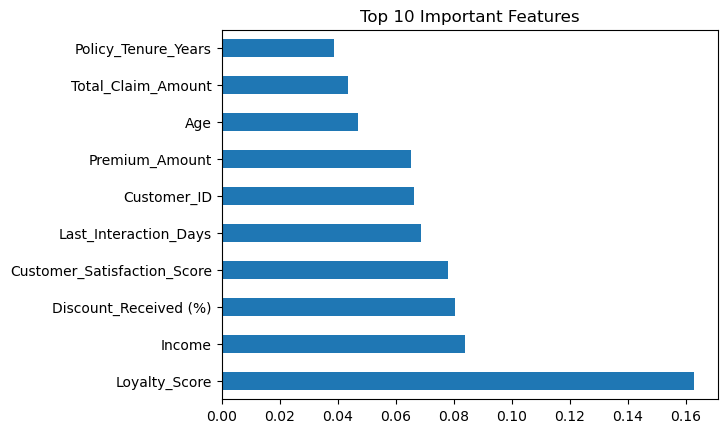

In [8]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()